<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/Series_de_Fourier_generalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolución de Problema de Sturm-Liouville con SymPy
Este cuaderno busca resolver el siguiente problema:

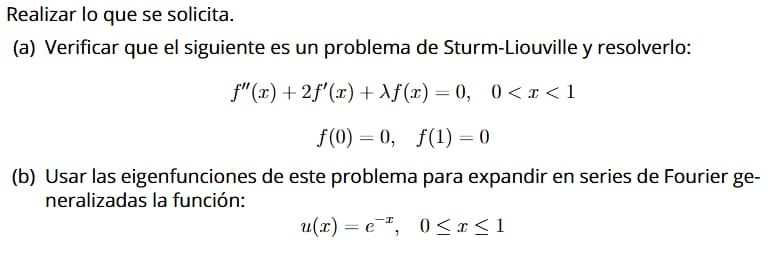



---

# Importar bibliotecas y definir la ED.

Se usará la librería Sympy y se define la ecuación diferencial inicial:

In [1]:
import sympy as sp
sp.init_printing()

x, lam = sp.symbols('x lambda')
f = sp.Function('f')

# Ecuación diferencial original
ode = sp.Eq(f(x).diff(x, 2) + 2*f(x).diff(x) + lam*f(x), 0)
display(sp.Eq(sp.Derivative(f(x), x, 2) + 2*sp.Derivative(f(x), x) + lam*f(x), 0))

                       2           
           d          d            
λ⋅f(x) + 2⋅──(f(x)) + ───(f(x)) = 0
           dx           2          
                      dx           

### Verificación de la forma de Sturm-Liouville

Se calcula que el factor integrante es: \begin{equation} \mu(x) = e^{2x} \end{equation}

por lo que al multiplicarlo por la función original queda como:

In [2]:
mu = sp.exp(2*x)
ode_transformed = sp.simplify(mu * (f(x).diff(x, 2) + 2*f(x).diff(x) + lam*f(x)))
ode_transformed = sp.simplify(ode_transformed)

# Forma de Sturm-Liouville
p = sp.exp(2*x)
r = sp.exp(2*x)
sl_form = sp.Eq(sp.diff(p * f(x).diff(x), x) + lam * r * f(x), 0)
display(sl_form)

                                      2           
        2⋅x      2⋅x d           2⋅x d            
λ⋅f(x)⋅ℯ    + 2⋅ℯ   ⋅──(f(x)) + ℯ   ⋅───(f(x)) = 0
                     dx                2          
                                     dx           

### Solución general de la ecuación

En este oasi

In [3]:
r1 = sp.symbols('r1')
char_eq = sp.Eq(r1**2 + 2*r1 + lam, 0)
sols = sp.solve(char_eq, r1)
display(sols)

mu = sp.sqrt(lam - 1)
A, B = sp.symbols('A B')
f_sol = sp.exp(-x) * (A * sp.cos(mu * x) + B * sp.sin(mu * x))
display(f_sol)

⎡    _______        _______    ⎤
⎣- ╲╱ 1 - λ  - 1, ╲╱ 1 - λ  - 1⎦

⎛     ⎛    _______⎞        ⎛    _______⎞⎞  -x
⎝A⋅cos⎝x⋅╲╱ λ - 1 ⎠ + B⋅sin⎝x⋅╲╱ λ - 1 ⎠⎠⋅ℯ  

### Aplicación de condiciones de frontera

In [4]:
cond1 = f_sol.subs(x, 0)
cond2 = f_sol.subs(x, 1)

# f(0) = 0 implica A = 0
cond1_simpl = sp.simplify(cond1)
A_val = sp.solve(sp.Eq(cond1_simpl, 0), A)[0]

# Segunda condición
f_sol_A0 = f_sol.subs(A, A_val)
cond2_simpl = sp.simplify(f_sol_A0.subs(x, 1))
mu_vals = sp.solve(sp.Eq(cond2_simpl, 0), mu)
display(mu_vals)

# Valores propios
n = sp.symbols('n', integer=True, positive=True)
lambda_n = 1 + (n * sp.pi)**2
f_n = sp.exp(-x) * sp.sin(n * sp.pi * x)

display(sp.Eq(sp.Symbol('lambda_n'), lambda_n))
display(sp.Eq(sp.Symbol('f_n(x)'), f_n))

[0, π]

      2  2    
λₙ = π ⋅n  + 1

         -x           
fₙ₍ₓ₎ = ℯ  ⋅sin(π⋅n⋅x)

### Expansión en serie de Fourier generalizada

In [5]:
u = sp.exp(-x)

# Producto interno con peso r(x) = e^{2x}
numerador = sp.integrate(u * f_n * r, (x, 0, 1))
denominador = sp.integrate(f_n**2 * r, (x, 0, 1))
c_n = sp.simplify(numerador / denominador)

display(sp.Eq(sp.Symbol('c_n'), c_n))

       ⎛        n⎞
     2⋅⎝1 - (-1) ⎠
cₙ = ─────────────
          π⋅n     

### Cálculo de coeficientes para primeros valores de n

In [6]:
for i in range(1, 6):
    expr = sp.integrate(sp.sin(i * sp.pi * x), (x, 0, 1))
    norm = sp.integrate(sp.sin(i * sp.pi * x)**2, (x, 0, 1))
    coef = expr / norm
    print(f"n = {i}: c_n = {sp.simplify(coef)}")

n = 1: c_n = 4/pi
n = 2: c_n = 0
n = 3: c_n = 4/(3*pi)
n = 4: c_n = 0
n = 5: c_n = 4/(5*pi)


### Construcción de la serie de Fourier truncada

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Número de términos de la serie
N_terms = 30

# Serie truncada simbólicamente
series = 0
for i in range(1, N_terms + 1):
    coef = sp.integrate(sp.sin(i * sp.pi * x), (x, 0, 1)) / sp.integrate(sp.sin(i * sp.pi * x)**2, (x, 0, 1))
    term = coef * sp.exp(-x) * sp.sin(i * sp.pi * x)
    series += term

display(sp.Eq(sp.Symbol('S_approx(x)'), series))

                -x               -x                 -x                 -x      ↪
             4⋅ℯ  ⋅sin(π⋅x)   4⋅ℯ  ⋅sin(3⋅π⋅x)   4⋅ℯ  ⋅sin(5⋅π⋅x)   4⋅ℯ  ⋅sin( ↪
Sₐₚₚᵣₒₓ₍ₓ₎ = ────────────── + ──────────────── + ──────────────── + ────────── ↪
                   π                3⋅π                5⋅π                7⋅π  ↪

↪             -x                 -x                  -x                  -x    ↪
↪ 7⋅π⋅x)   4⋅ℯ  ⋅sin(9⋅π⋅x)   4⋅ℯ  ⋅sin(11⋅π⋅x)   4⋅ℯ  ⋅sin(13⋅π⋅x)   4⋅ℯ  ⋅si ↪
↪ ────── + ──────────────── + ───────────────── + ───────────────── + ──────── ↪
↪                9⋅π                11⋅π                13⋅π                15 ↪

↪                -x                  -x                  -x                  - ↪
↪ n(15⋅π⋅x)   4⋅ℯ  ⋅sin(17⋅π⋅x)   4⋅ℯ  ⋅sin(19⋅π⋅x)   4⋅ℯ  ⋅sin(21⋅π⋅x)   4⋅ℯ  ↪
↪ ───────── + ───────────────── + ───────────────── + ───────────────── + ──── ↪
↪ ⋅π                17⋅π                19⋅π                21⋅π               ↪

↪ x                  -x  

### Comparación gráfica entre $u(x)$ y la serie de Fourier

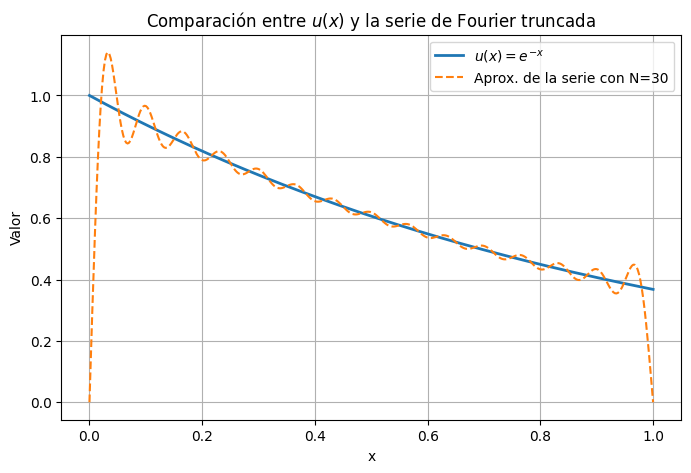

In [10]:
# Convertimos las funciones simbólicas a funciones numéricas
u_func = sp.lambdify(x, sp.exp(-x), "numpy")
series_func = sp.lambdify(x, series, "numpy")

# Valores de x
x_vals = np.linspace(0, 1, 400)
u_vals = u_func(x_vals)
s_vals = series_func(x_vals)

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(x_vals, u_vals, label="$u(x) = e^{-x}$", linewidth=2)
plt.plot(x_vals, s_vals, label=f"Aprox. de la serie con N={N_terms}", linestyle='--')
plt.title("Comparación entre $u(x)$ y la serie de Fourier truncada")
plt.xlabel("x")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.show()